# Lab 3

__Team Members__
- Name 1: Jorge Olmos
- Name 2: Bosang Yun
- Name 3: Yucheol Shin
- Name 4: Siu Wai Yeung

# Content
* [Business Understanding](#business-understanding)
* [Data Understanding](#data-understanding)
    - [Part 1](#data-understanding-part1)
    - [Part 2](#data-understanding-part2)
* [Modeling Evaluation](#deployment)
    - [Train and Adjust Parameters](#train-adjust)
    - [Evaluate and Compare](#evaluate-compare)
    - [Visualize Resutls](#visualize-results)
    - [Summarize Rammifications](#summarize-rammifications)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

In [30]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv') # read in the csv file
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [31]:
import math
from datetime import date


hotel_bookings_transform = hotel_bookings
# removing 'agent','company' and 'country'
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company', 'country'])

# For the remainder they appear to have been omitted accidentally and we decided to populate the missing values with the mode.
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 


hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)

In [32]:
# Encoding process

hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)

# Convert Date to Ordinal
import datetime as dt
hotel_bookings_transform['reservation_status_date'] = pd.to_datetime(hotel_bookings_transform['reservation_status_date'])
hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.toordinal)

hotel_bookings_transform=hotel_bookings_transform.assign(booking_day_of_year = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_day_of_year']=pd.to_datetime(hotel_bookings_transform.booking_day_of_year)
hotel_bookings_transform['booking_day_of_year']=hotel_bookings_transform['booking_day_of_year'].map(lambda x: x.toordinal() - date(x.year, 1, 1).toordinal() + 1)


hotel_bookings_transform=hotel_bookings_transform.drop(columns=['arrival_date_year','reservation_status_date'])
#hotel_bookings_transform['booking_date']=hotel_bookings_transform['booking_date'].map(dt.datetime.toordinal)

# 1. Business Understanding  <a id='business-understanding'/>

## `Purpose of Data Selected`

## `How will you measure the effectiveness of a good algorithm? `

## `Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?`

# 2. Data Understanding <a id = '#data-understanding'/>

## Part 1 <a id ='#data-understanding-part1'/>

### `Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>





### `Verify data quality`

#### `Missing values?`
Upon initial inspection of the 31 attributes, we noticed the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__” and “__company__” attributes as they do not provide any valuable information for analysis
3. we decided to replace '__Undefined__' with '__SC__' under Meal attribute as they are synonymous. 
4. We classify the non-categorical attributes that are above and below 1.5 times the interquartile range of the dataset as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* agent- 16340
* company- 112593
* children- 4
* country- 488
* market_segment - 2
* meal - 1169
* distribution_channel – 5

There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 
4. For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


To simplify our data exploration, we decided to __remove__ the __agent and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. 
Data cleaning for the above attributes will be followed. 

#### `Outliers`
##### Outlier removal
- First we decided to take a look the simple statistics of the continuous variables to see if they make sense. 
- __adr__ and __lead_time__ had minimum and maximum values that appear as data entry error.  
- __stays_in_week_nights__ and __stays_in_weekend_nights__ had too extreme maximum values when there are only seven days in a week. 
- __days_in_waiting_list__, __total_of_special_requests__ and __required_car_parking_spaces__ had reasonable data distribution. 
- After determining that the 4 continuous features(adr, lead_time, stays_week_nights, stays_weekend_nights) have extreme outliers, the 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed

# 3. Modeling and Evaluation

In [36]:
# from rpy2.robjects import pandas2ri
# pandas2ri.activate()

# from rpy2.robjects.packages import importr


import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter


#base = importr('base')
# call an R function on a Pandas DataFrame
#base.summary(hotel_bookings_transform)


# with localconverter(ro.default_converter + pandas2ri.converter):
#   r_from_pd_df = ro.conversion.py2rpy(hotel_bookings_transform)


#r_from_pd_df = ro.conversion.py2rpy(hotel_bookings_transform)

hotel_bookings_transform.to_csv('output.csv')

In [37]:
%R bookings <- read.csv("output.csv")
%R head(bookings)

,X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
1,0,1,0,342,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,182
2,1,1,0,737,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,182
3,2,1,0,7,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,182
4,3,1,0,13,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,182
5,4,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,182
6,5,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,182


## Train and adjust parameters

In [52]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rpy2.robjects.packages import importr
from rpy2 import robjects as robj


%matplotlib inline

%load_ext rmagic
%load_ext rpy2.ipython 

# %R arules = importr('arules') # same as importing in R with the "library" command
# %R arules_viz = importr('arulesViz') # visualize the different rules

# %R library('mlbench')

%R library(arules)


# convert to transactions, where column indicates the output of the attribute
%R trans <- as(bookings, "transactions")

# # Now that we have transactions, its time to run the apriori algorithm
%R isets <- apriori(trans, parameter=list(target="frequent", support=0.5))
# sort it and display some of the frequent itemsets from apriori
%R isets <- sort(isets, by="support") 
%R inspect(head(isets, n=100))
%R length(isets)

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59695 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[52 item(s), 119390 transaction(s)] done [0.24s].
sorting and recoding items ... [21 item(s)] done [0.02s].
creating transaction tree ... done [0.10s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.82s].
sorting transactions ... done [0.05s].
writing ... [233500 set(s)] done [0.15s].
creating S4 object  ... done [0.15s].
      items                       

       previous_cancellations=[0,26]}               1                        0 119390
[50]  {previous_cancellations=[0,26],                                                
       booking_changes=[0,21]}                      1                        0 119390
[51]  {distribution_channel=[0,3],                                                   
       is_repeated_guest=[0,1]}                     1                        0 119390
[52]  {is_repeated_guest=[0,1],                                                      
       deposit_type=[0,2]}                          1                        0 119390
[53]  {meal=[0,3],                                                                   
       is_repeated_guest=[0,1]}                     1                        0 119390
[54]  {babies=[0,10],                                                                
       is_repeated_guest=[0,1]}                     1                        0 119390
[55]  {children=[0,10],                               

[97]  {is_canceled=[0,1],                                                            
       days_in_waiting_list=[0,391]}                1                        0 119390
[98]  {hotel=[0,1],                                                                  
       days_in_waiting_list=[0,391]}                1                        0 119390
[99]  {booking_changes=[0,21],                                                       
       days_in_waiting_list=[0,391]}                1                        0 119390
[100] {is_canceled=[0,1],                                                            
       required_car_parking_spaces=[0,8]}           1                        0 119390


array([233500], dtype=int32)

## Evaluate and Compare

In [51]:
# Do same thing, getting only the maximal sets
%R is_max <- isets[is.maximal(isets)]
%R inspect(head(sort(is_max, by="support")))
%R length(is_max)

    items                                   support transIdenticalToItemsets  count
[1] {children=[0,10],                                                              
     babies=[0,10],                                                                
     meal=[0,3],                                                                   
     distribution_channel=[0,3],                                                   
     is_repeated_guest=[0,1],                                                      
     previous_cancellations=[0,26],                                                
     previous_bookings_not_canceled=[0,72],                                        
     reserved_room_type=[0,9],                                                     
     deposit_type=[0,2],                                                           
     days_in_waiting_list=[0,391]}                1                        0 119390
[2] {children=[0,10],                                                       

array([42471], dtype=int32)

In [50]:
%R rules <- apriori(trans, parameter=list(support=.5, confidence=.9))
#%R rules <- apriori( trans, list(minlen=1, supp=0.01, conf=0.01)

%R inspect(head(rules, n=100))

# print out measures of rule quality
%R quality(head(rules))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59695 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[52 item(s), 119390 transaction(s)] done [0.21s].
sorting and recoding items ... [21 item(s)] done [0.02s].
creating transaction tree ... done [0.09s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.39s].
writing ... [1615673 rule(s)] done [0.81s].
creating S4 object  ... done [0.66s].
      lhs                                  rhs                                       support confidence  coverage      lift  count
[1]   {}                                => {customer_type=[2,3]}                   0.9610269  0.9610269 1.0000000 1.0000000 114737
[2]

[56]  {reservation_status=[1,2]}        => {days_in_waiting_list=[0,391]}          0.6396934  1.0000000 0.6396934 1.0000000  76373
[57]  {reservation_status=[1,2]}        => {required_car_parking_spaces=[0,8]}     0.6396934  1.0000000 0.6396934 1.0000000  76373
[58]  {reservation_status=[1,2]}        => {is_canceled=[0,1]}                     0.6396934  1.0000000 0.6396934 1.0000000  76373
[59]  {reservation_status=[1,2]}        => {hotel=[0,1]}                           0.6396934  1.0000000 0.6396934 1.0000000  76373
[60]  {reservation_status=[1,2]}        => {booking_changes=[0,21]}                0.6396934  1.0000000 0.6396934 1.0000000  76373
[61]  {assigned_room_type=[0,3)}        => {customer_type=[2,3]}                   0.6330095  0.9616241 0.6582712 1.0006214  75575
[62]  {assigned_room_type=[0,3)}        => {reserved_room_type=[0,9]}              0.6582712  1.0000000 0.6582712 1.0000000  78591
[63]  {assigned_room_type=[0,3)}        => {previous_bookings_not_canceled=[0,72]} 

,support,confidence,coverage,lift,count
1,0.961027,0.961027,1.0,1.0,114737
2,1.000000,1.000000,1.0,1.0,119390
3,1.000000,1.000000,1.0,1.0,119390
4,1.000000,1.000000,1.0,1.0,119390
5,1.000000,1.000000,1.0,1.0,119390
6,1.000000,1.000000,1.0,1.0,119390


In [54]:
# sort out the rules and print additional "interest" measures
%R rules <- sort(rules, by="lift")
%R inspect(head(rules, n=100))w
%R interestMeasure(rules[1:100], method=c("phi", "gini"), trans=trans)

      lhs                                        rhs                     support confidence  coverage     lift count
[1]   {total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[2]   {reserved_room_type=[0,9],                                                                                    
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[3]   {previous_bookings_not_canceled=[0,72],                                                                       
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[4]   {previous_cancellations=[0,26],                                                                               
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[5]   {is_repeated_guest=[0,1],                                 

       previous_bookings_not_canceled=[0,72],                                                                       
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[30]  {is_repeated_guest=[0,1],                                                                                     
       previous_bookings_not_canceled=[0,72],                                                                       
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[31]  {distribution_channel=[0,3],                                                                                  
       previous_bookings_not_canceled=[0,72],                                                                       
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[32]  {previous_bookings_not_canceled=[0,72],                   

       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[53]  {is_repeated_guest=[0,1],                                                                                     
       deposit_type=[0,2],                                                                                          
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[54]  {meal=[0,3],                                                                                                  
       is_repeated_guest=[0,1],                                                                                     
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[55]  {babies=[0,10],                                                                                               
       is_repeated_guest=[0,1],                                 

[76]  {is_canceled=[0,1],                                                                                           
       deposit_type=[0,2],                                                                                          
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[77]  {hotel=[0,1],                                                                                                 
       deposit_type=[0,2],                                                                                          
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[78]  {booking_changes=[0,21],                                                                                      
       deposit_type=[0,2],                                                                                          
       total_of_special_requests=[0,1)}       => {customer_type=

       days_in_waiting_list=[0,391],                                                                                
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[100] {booking_changes=[0,21],                                                                                      
       days_in_waiting_list=[0,391],                                                                                
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898


R[write to console]: Error in "factor" %in% attrib[["class", exact = TRUE]] : 
  node stack overflow

R[write to console]: In addition: 
R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 




Error in "factor" %in% attrib[["class", exact = TRUE]] : 
  node stack overflow


## Visualize Results

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



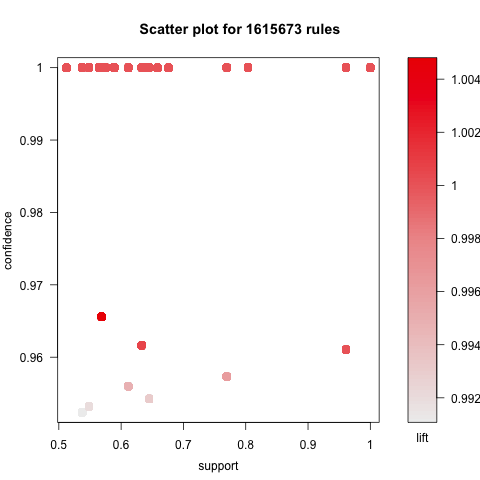

In [56]:

# visualize the different rules, 
#  the first visualization might take some time to render properly
%R library(arulesViz)
%R plot(rules)

In [ ]:

# a great plot
%R plot(rules, method="grouped")
%R inspect(rules)
%R length(rules)

## Summarize the Ramifications

# 4. Deployment

# 5. Exceptional Work